# Predicting Bike Rentals

Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

The dataset contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day.

Here are the descriptions for the relevant columns:

- instant - A unique sequential ID number for each row
- dteday - The date of the rentals
- season - The season in which the rentals occurred
- yr - The year the rentals occurred
- mnth - The month the rentals occurred
- hr - The hour the rentals occurred
- holiday - Whether or not the day was a holiday
- weekday - The day of the week (as a number, 0 to 7)
- workingday - Whether or not the day was a working day
- weathersit - The weather (as a categorical variable)
- temp - The temperature, on a 0-1 scale
- atemp - The adjusted temperature
- hum - The humidity, on a 0-1 scale
- windspeed - The wind speed, on a 0-1 scale
- casual - The number of casual riders (people who hadn't - previously signed up with the bike sharing program)
- registered - The number of registered riders (people who had already signed up)
- cnt - The total number of bike rentals (casual + registered)

In [1]:
import pandas as pd

bike_rentals = pd.read_csv("bike_rental_hour.csv")
print(bike_rentals.head())
print(bike_rentals.shape)

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
(17379, 17)


In [2]:
print(bike_rentals.tail())

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   4

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

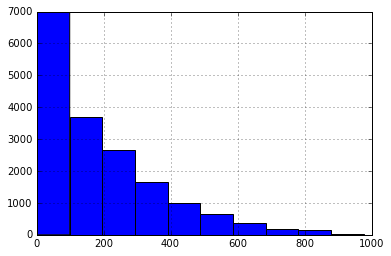

In [4]:
bike_rentals["cnt"].hist()
plt.show()

In [5]:
bike_rentals["cnt"].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [6]:
import seaborn as sns

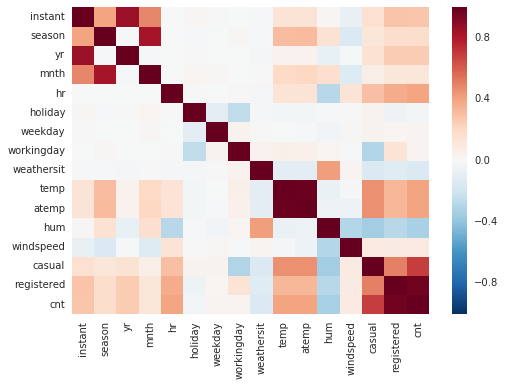

In [7]:
corrmat=bike_rentals.corr()
sns.heatmap(corrmat)
plt.show()

## Tweaking the Features

We can introduce some order into the training process by creating a new column based on the hr column with labels for morning, afternoon, evening, and night. This will bundle similar times together, enabling the model to make better decisions.

In [8]:
def assign_label(el):
    if (el>=6)&(el<12):
        return 1
    elif (el>=12)&(el<18):
        return 2
    elif (el>=18)&(el<24):
        return 3
    else:
        return 4

In [9]:
bike_rentals["time_label"]=bike_rentals["hr"].apply(assign_label)
print(bike_rentals.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

   time_label  
0           4  
1           4  
2           4  
3           4  
4           

I've chosen mean squared error as metric since it makes more evident the bigger discrepancies between real and predicted value.

## Splitting the Data into Train and Test Sets

I'll select the 80% of the dataset as train set and the remaining 20% as test set.

In [10]:
train = bike_rentals.sample(frac=0.8)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 10296 to 7187
Data columns (total 18 columns):
instant       13903 non-null int64
dteday        13903 non-null object
season        13903 non-null int64
yr            13903 non-null int64
mnth          13903 non-null int64
hr            13903 non-null int64
holiday       13903 non-null int64
weekday       13903 non-null int64
workingday    13903 non-null int64
weathersit    13903 non-null int64
temp          13903 non-null float64
atemp         13903 non-null float64
hum           13903 non-null float64
windspeed     13903 non-null float64
casual        13903 non-null int64
registered    13903 non-null int64
cnt           13903 non-null int64
time_label    13903 non-null int64
dtypes: float64(4), int64(13), object(1)
memory usage: 2.0+ MB


In [11]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 16 to 17366
Data columns (total 18 columns):
instant       3476 non-null int64
dteday        3476 non-null object
season        3476 non-null int64
yr            3476 non-null int64
mnth          3476 non-null int64
hr            3476 non-null int64
holiday       3476 non-null int64
weekday       3476 non-null int64
workingday    3476 non-null int64
weathersit    3476 non-null int64
temp          3476 non-null float64
atemp         3476 non-null float64
hum           3476 non-null float64
windspeed     3476 non-null float64
casual        3476 non-null int64
registered    3476 non-null int64
cnt           3476 non-null int64
time_label    3476 non-null int64
dtypes: float64(4), int64(13), object(1)
memory usage: 516.0+ KB


In [12]:
sorted_corr=corrmat["cnt"].abs().sort_values(ascending=False)
print(sorted_corr)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64


## Applying Linear Regression

I'm ready to apply linear regression to the data. 

Linear regression works best when predictors are linearly correlated to the target and also independent, thus linear regression will probably work fairly well on this data, given that many of the columns are highly correlated with cnt.

I initially tried to remove from the feature list the columns with absolute correlation < 0.1, but then I decided to include every available column since they improve sensibly the model.

In [13]:
features = list(train.columns)
features.remove("cnt")
features.remove("casual")
features.remove("registered")
features.remove("dteday")

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
lr = LinearRegression()
lr.fit(train[features], train["cnt"])
predictions_test = lr.predict(test[features])
test_mse=mean_squared_error(test["cnt"], predictions_test)
test_rmse=test_mse**(1/2)
print(test_rmse)

134.31657624098224


In [16]:
print(test_mse)
print(test["cnt"], " ", predictions_test)

18040.942653099595
16        93
18        35
22        28
27         6
28         3
29         2
32        20
37        59
40        65
42        30
56        51
57        61
69         5
71         1
72         2
74        36
76       179
77       100
79        57
80        78
81        97
92         6
97        33
101       57
104       71
108      190
110      132
111       89
112       43
114       19
        ... 
17206     26
17208     23
17215      1
17224    121
17225    126
17228     50
17232     34
17241     36
17244     23
17251     13
17270    103
17275    174
17278    117
17281     44
17283     25
17290    112
17300    271
17306     59
17307     26
17311      3
17328     60
17332     28
17334     15
17343    144
17346    138
17352     47
17359      3
17363    196
17365    120
17366    157
Name: cnt, Length: 3476, dtype: int64   [123.48468676  69.75689135  90.31784882 ... 134.004916   155.50511013
 182.89198823]


The error is far too large, I need to refine the model.

## Applying Decision Trees

In order to refine the model, by taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
rmses_tree_max_depth=[]
for i in range(1,100):
    reg = DecisionTreeRegressor(max_depth=i)
    reg.fit(train[features], train["cnt"])
    predictions = reg.predict(test[features])
    mse_tree=mean_squared_error(test["cnt"], predictions)
    rmse_tree=mse_tree**(1/2)
    print(rmse_tree)
    rmses_tree_max_depth.append(rmse_tree)
    """if (rmses_tree_max_depth[i-1]-rmses_tree_max_depth[i-2]<10)&(i>3):
        break"""

152.3552373229009
139.15716555896006
127.12236591942835
119.44844373647258
111.52670538568583
105.87893149561752
85.7422665394173
72.74911859846704
64.86702508330663
60.361982515989126
57.03441531309081
57.27352958389284
55.35677227811295
56.624340318656174
57.71639096345073
56.51383889490169
57.40734932815963
57.76091588098593
57.01835159616202
57.26396543211066
59.960157686575876
58.53607219378818
57.515718840911916
58.72341676968686
56.50907532621156
58.36104486044832
57.664334213031005
58.79280366544165
57.27751042109249
58.83586045040275
58.92087351493264
57.72209696087292
57.61499483172023
57.334619826156484
59.94686945664864
58.629816719102365
58.19843243077351
58.47954605885474
58.08149457019404
58.7830361538995
59.23528061472469
58.479066410856674
57.9758317369629
58.071305024113954
58.42024404000638
58.84972866434062
58.21751008942806
58.43360005724594
58.24522827494902
58.79141661359957
59.528466950235995
57.64419803691224
58.737339795960274
57.73021159033346
59.637710399764

In [19]:
rmses_tree_max_depth_min_samples_split=[]
for i in range(1,100):
    rmses_tree_samples_split=[]
    for j in range(5,11):
        reg = DecisionTreeRegressor(max_depth=i, min_samples_split=j)
        reg.fit(train[features], train["cnt"])
        predictions = reg.predict(test[features])
        mse_tree_ssplit=mean_squared_error(test["cnt"], predictions)
        rmse_tree_ssplit=mse_tree_ssplit**(1/2)
        rmses_tree_samples_split.append(rmse_tree_ssplit)
    rmses_tree_max_depth_min_samples_split.append(rmses_tree_samples_split)
print(rmses_tree_max_depth_min_samples_split)

[[152.3552373229009, 152.3552373229009, 152.3552373229009, 152.3552373229009, 152.3552373229009, 152.3552373229009], [139.15716555896006, 139.15716555896006, 139.15716555896006, 139.15716555896006, 139.15716555896006, 139.15716555896006], [127.12236591942835, 127.12236591942835, 127.12236591942835, 127.12236591942835, 127.12236591942835, 127.12236591942835], [119.44844373647258, 119.44844373647258, 119.44844373647258, 119.44844373647258, 119.44844373647258, 119.44844373647258], [111.52670538568583, 111.52670538568583, 111.52670538568583, 111.52670538568583, 111.52670538568583, 111.52670538568583], [105.87893149561752, 105.87893149561752, 105.87893149561752, 105.87893149561752, 105.87893149561752, 105.87893149561752], [85.74212889238275, 85.74223143707557, 85.7350280206833, 85.73510085223705, 85.73510085223705, 85.73299808764413], [72.71923694276484, 72.73052997682652, 72.70490911357574, 72.70488655729676, 72.70582318687154, 72.69174014117546], [64.79185998368551, 64.7421355622567, 64.6

In [20]:
rmses_tree_max_depth_min_samples_leaf=[]
rmse_mean_tree_samples_leaf_min=100000
for i in range(7,19):
    rmses_tree_samples_leaf=[]
    for j in range(1,7):
        reg = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        reg.fit(train[features], train["cnt"])
        predictions = reg.predict(test[features])
        mse_tree_sleaf=mean_squared_error(test["cnt"], predictions)
        rmse_tree_sleaf=mse_tree_sleaf**(1/2)
        rmses_tree_samples_leaf.append(rmse_tree_sleaf)
    rmses_tree_max_depth_min_samples_leaf.append(rmses_tree_samples_leaf)
    if np.mean(rmses_tree_samples_leaf)<rmse_mean_tree_samples_leaf_min:
        rmse_mean_tree_samples_leaf_min=np.mean(rmses_tree_samples_leaf)
        best_max_depth=i
print("The best max depth is: ", best_max_depth)

The best max depth is:  16


In [21]:
rmses_tree_samples_leaf=[]
rmse_tree_samples_leaf_min=100000
for j in range(1,7):
    reg = DecisionTreeRegressor(max_depth=11, min_samples_leaf=j)
    reg.fit(train[features], train["cnt"])
    predictions = reg.predict(test[features])
    mse_tree_sleaf=mean_squared_error(test["cnt"], predictions)
    rmse_tree_sleaf=mse_tree_sleaf**(1/2)
    rmses_tree_samples_leaf.append(rmse_tree_sleaf)
    if rmse_tree_samples_leaf_min>rmse_tree_sleaf:
        rmse_tree_samples_leaf_min=rmse_tree_sleaf
        best_min_samples_leaf=j
print("The best min sample leaves is: ", best_min_samples_leaf)

The best min sample leaves is:  2


It seems the best combination is max_depth=16, min_samples_leaf=2 to minimize the rmse.

## Applying Random Forest

Let's try Random Forest algorithm. Random forests tend to be much more accurate than simple models like linear regression and due to the way random forests are constructed, they tend to overfit much less than decision trees.

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rmses_forest_samples_leaf=[]
rmse_forest_samples_leaf_min=100000
for j in range(1,7):
    rfr = RandomForestRegressor(n_estimators=150, min_samples_leaf=j)
    rfr.fit(train[features], train["cnt"])
    predictions = rfr.predict(test[features])
    mse_forest_sleaf=mean_squared_error(test["cnt"], predictions)
    rmse_forest_sleaf=mse_forest_sleaf**(1/2)
    rmses_forest_samples_leaf.append(rmse_forest_sleaf)
    if rmse_forest_samples_leaf_min>rmse_forest_sleaf:
        rmse_forest_samples_leaf_min=rmse_forest_sleaf
        best_min_forest_samples_leaf=j
print("The best min sample leaves for the randomforest is: ", best_min_forest_samples_leaf)
print("with a rmse of: ", np.min(rmses_forest_samples_leaf))

The best min sample leaves for the randomforest is:  1
with a rmse of:  43.40991496874485


### Now the rmse is pretty low!

## Predicting casual and registered instead of cnt.

In [24]:
rmses_forest_casual=[]
rmse_forest_casual_min=100000
for j in range(1,7):
    rfr = RandomForestRegressor(n_estimators=150, min_samples_leaf=j)
    rfr.fit(train[features], train["casual"])
    predictions_casual = rfr.predict(test[features])
    mse_forest_sleaf=mean_squared_error(test["casual"], predictions_casual)
    rmse_forest_sleaf=mse_forest_sleaf**(1/2)
    rmses_forest_casual.append(rmse_forest_sleaf)
    if rmse_forest_casual_min>rmse_forest_sleaf:
        rmse_forest_casual_min=rmse_forest_sleaf
        best_min_forest_casual=j
print("The best min sample leaves for the target casual is: ", best_min_forest_casual)
print("with a rmse of: ", np.min(rmses_forest_casual))

The best min sample leaves for the target casual is:  1
with a rmse of:  14.066722258319425


In [25]:
rmses_forest_registered=[]
rmse_forest_registered_min=100000
for j in range(1,7):
    rfr = RandomForestRegressor(n_estimators=150, min_samples_leaf=j)
    rfr.fit(train[features], train["registered"])
    predictions_registered = rfr.predict(test[features])
    mse_forest_sleaf=mean_squared_error(test["registered"], predictions_registered)
    rmse_forest_sleaf=mse_forest_sleaf**(1/2)
    rmses_forest_registered.append(rmse_forest_sleaf)
    if rmse_forest_registered_min>rmse_forest_sleaf:
        rmse_forest_registered_min=rmse_forest_sleaf
        best_min_forest_registered=j
print("The best min sample leaves for the target registered is: ", best_min_forest_registered)
print("with a rmse of: ", np.min(rmses_forest_registered))

The best min sample leaves for the target registered is:  1
with a rmse of:  37.32468199324603


In [26]:
print(predictions_registered)

[ 56.76658895  67.23734372  44.95283136 ... 436.79694346 119.40877533
 132.98628468]


In [27]:
predictions_casual_ser=pd.Series(predictions_casual)
predictions_registered_ser=pd.Series(predictions_registered)
predictions_cnt_comb_ser=predictions_casual_ser+predictions_registered_ser
mse_cnt_comb=mean_squared_error(test["cnt"], predictions_cnt_comb_ser)
rmse_cnt_comb=mse_cnt_comb**(1/2)
print(rmse_cnt_comb)

45.19150057017356


Trying to predict "casual" and "registered" separately before summing them or to predict directly the "cnt" directly produce more or less the same result.